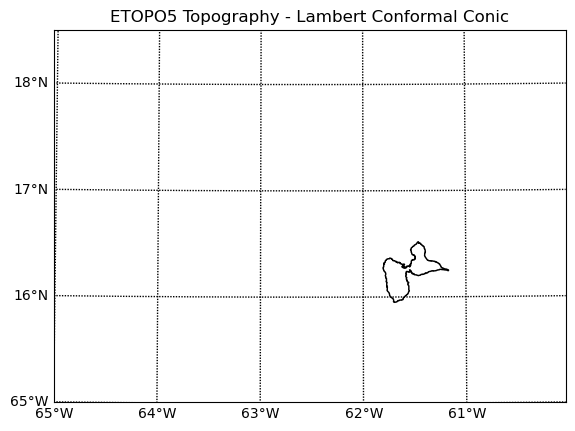

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
'''
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)
            '''
m = Basemap(llcrnrlon=-65.0,llcrnrlat=15.0,urcrnrlon=-60.0,urcrnrlat=18.5,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='f',area_thresh=1000.,projection='lcc',\
            lat_1=16.0,lon_0=-62.5,ax=ax)
# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
#topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
#im = m.imshow(topodat,cm.GMT_haxby)
# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries()
m.drawstates()
# draw parallels and meridians.
# label on left and bottom of map.
parallels = np.arange(10.,20,1.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(-65.,-60.,1.)
m.drawmeridians(meridians,labels=[1,0,0,1])
# add colorbar
#cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# attach new axes image to existing Basemap instance.
m.ax = ax
# create light source object.
from matplotlib.colors import LightSource
ls = LightSource(azdeg = 90, altdeg = 20)
# convert data to rgb array including shading from light source.
# (must specify color map)
rgb = ls.shade(topodat, cm.GMT_haxby)
im = m.imshow(rgb)
# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries()
m.drawstates()
ax.set_title('Shaded ETOPO5 Topography - Lambert Conformal Conic')
plt.show()